In [57]:
import pandas as pd
import os
import numpy as np

documents = []
path = 'texts/'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) # count files in corpus
print(filenames[:10]) # print names of 1st ten files in corpus



7
['texts/anne.txt', 'texts/carpentry.txt', 'texts/household.txt', 'texts/oz.txt', 'texts/quilts.txt', 'texts/radio.txt', 'texts/soap.txt']


In [59]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())


In [60]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (7, 28305). Number of tokens 431880


In [61]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)

In [62]:
document_topic_distributions = model.fit_transform(dtm)

In [77]:
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)

In [78]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

                00       000      0000     00000      0002     00022  \
Topic 0   0.284336  0.273106  0.193799  0.183661  0.240459  0.189414   
Topic 1   0.282135  0.429886  0.180363  0.210924  0.176096  0.197776   
Topic 2   0.228119  0.285528  0.232802  0.199652  0.207414  0.216283   
Topic 3   0.391398  0.382755  0.207796  0.200194  0.200734  0.210996   
Topic 4   0.339671  0.570121  0.206024  0.208011  0.189753  0.217001   
...            ...       ...       ...       ...       ...       ...   
Topic 95  0.233317  0.250611  0.212707  0.195401  0.191980  0.207354   
Topic 96  0.255447  0.368277  0.196880  0.203562  0.187605  0.202949   
Topic 97  0.231214  0.263657  0.198172  0.217798  0.203392  0.218453   
Topic 98  0.205398  0.296390  0.209676  0.196070  0.220312  0.206196   
Topic 99  0.266375  0.416276  0.193755  0.214186  0.228266  0.208181   

             00025      0003     00033      0004  ...       ziz    zodiac  \
Topic 0   0.235559  0.166321  0.227120  0.183532  ...  0.1

In [80]:
topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)

water           1.844029
sugar           1.503968
time            1.442739
set             1.441557
ingredients     1.350792
butter          1.324085
_mode_          1.312847
little          1.287094
salt            1.183906
small           1.176158
_time_          1.136418
good            1.121470
_seasonable_    1.101443
cut             1.076260
use             1.067398
large           1.009735
eggs            1.001758
used            0.999058
Name: Topic 9, dtype: float64

In [86]:
document_topic_distributions = pd.DataFrame(
    document_topic_distributions, columns=topic_names)
print(document_topic_distributions)

        Topic 0       Topic 1       Topic 2       Topic 3       Topic 4  \
0  2.108593e-07  2.108593e-07  2.108593e-07  2.108593e-07  2.108593e-07   
1  4.721658e-07  4.721658e-07  4.721658e-07  4.721658e-07  4.721658e-07   
2  3.942798e-08  3.942798e-08  3.942798e-08  3.942798e-08  3.942798e-08   
3  5.730002e-07  5.730002e-07  5.730002e-07  5.730002e-07  5.730002e-07   
4  5.049230e-07  5.049230e-07  5.049230e-07  5.049230e-07  5.049230e-07   
5  2.877118e-07  2.877118e-07  2.877118e-07  2.877118e-07  2.877118e-07   
6  2.656607e-07  2.656607e-07  2.656607e-07  2.656607e-07  2.656607e-07   

        Topic 5       Topic 6       Topic 7       Topic 8       Topic 9  ...  \
0  2.108593e-07  2.108593e-07  2.108593e-07  2.108593e-07  2.108593e-07  ...   
1  4.721658e-07  4.721658e-07  4.721658e-07  4.721658e-07  4.721658e-07  ...   
2  3.942798e-08  3.942798e-08  3.942798e-08  3.942798e-08  3.942798e-08  ...   
3  5.730002e-07  5.730002e-07  5.730002e-07  5.730002e-07  5.730002e-07  ...   

In [97]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words


water      1.216246
anne       1.160305
marilla    1.048951
said       0.964860
soap       0.883108
good       0.872624
used       0.827069
little     0.824780
time       0.765050
white      0.760912
don        0.720734
mrs        0.715693
let        0.664526
hour       0.662518
oh         0.621150
oil        0.614440
head       0.613608
like       0.600606
Name: Topic 2, dtype: float64

00       0.228119
000      0.285528
0000     0.232802
00000    0.199652
0002     0.207414
00022    0.216283
00025    0.182551
0003     0.181318
00033    0.228134
0004     0.209640
00043    0.182390
0005     0.233071
00065    0.170985
0007     0.201019
0008     0.242039
00087    0.208843
000th    0.230789
001      0.176771
0010     0.273909
00108    0.195224
Name: Topic 2, dtype: float64


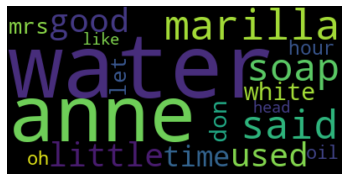

In [98]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
